170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.2707 - loss: 2.0425 - val_accuracy: 0.3670 - val_loss: 1.7554
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.3829 - loss: 1.7195 - val_accuracy: 0.3973 - val_loss: 1.6726
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4104 - loss: 1.6302 - val_accuracy: 0.4238 - val_loss: 1.6215
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.4381 - loss: 1.5646 - val_accuracy: 0.4263 - val_loss: 1.5966
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.4539 - loss: 1.5192 - val_accuracy: 0.4577 - val_loss: 1.5277
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4705 - loss: 1.4786 - val_accuracy: 0.4544 - val_loss: 1.5483
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.4796 - loss: 1.4604 - val_accuracy: 0.4372 - val_loss: 1.6093
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4868 -

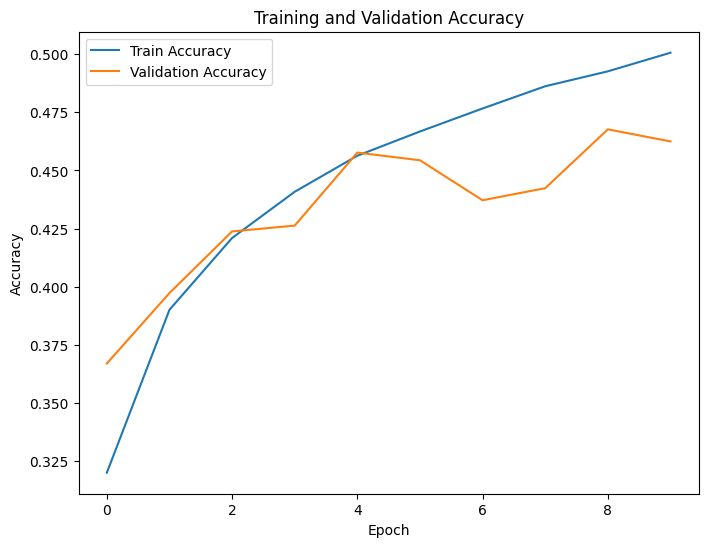

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
